In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
nperclust = 100
blur =  1
A = [1,3]
B = [1,-2]

a = [A[0]+np.random.randn(nperclust)*blur ,A[1]+np.random.randn(nperclust)*blur]
b = [B[0]+np.random.randn(nperclust)*blur ,B[1]+np.random.randn(nperclust)*blur]

labels_np = np.vstack((np.zeros((nperclust,1)),np.ones((nperclust,1))))

data_np = np.hstack((a,b)).T

In [3]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

Text(0, 0.5, 'qwerty dimension 2')

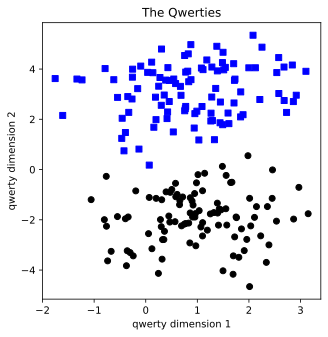

In [4]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')


In [12]:
def createANNmodel(learningrate):
  ANNclassify= nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  )
  lossfun = nn.BCELoss()
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)
  return ANNclassify,lossfun,optimizer

In [15]:
numepochs = 1000
def trainmodel(ANNmodel):
  losses = torch.zeros(numepochs)
  for epochi in range(numepochs):
    yHat = ANNmodel(data)
    loss = lossfun(yHat,labels)
    losses[epochi]= loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNmodel(data)
  totalacc = 100*torch.mean(((predictions>.5)== labels).float())
  return losses, predictions,totalacc

Final Accuracy:99.5%


(Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'))

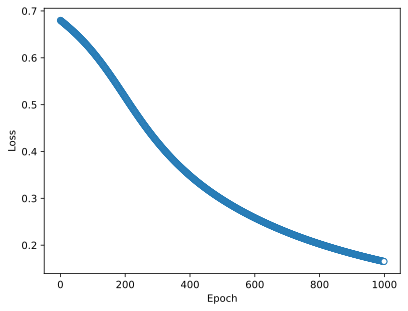

In [16]:
ANNclassify, lossfun,optimizer = createANNmodel(0.01)
losses, predictions,totalacc = trainmodel(ANNclassify)
print('Final Accuracy:%g%%'%totalacc)
plt.plot(losses.detach(),'o',markerfacecolor = 'w',linewidth=.1)
plt.xlabel('Epoch'),plt.ylabel('Loss')

In [17]:
learningrates = np.linspace(.001,.1,50)

accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainmodel(ANNclassify)

  accByLR.append(totalacc)
  allLosses[i,:]= losses.detach()


<ipython-input-17-003f48d05db4>:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:]= losses.detach()


Text(0, 0.5, 'loss')

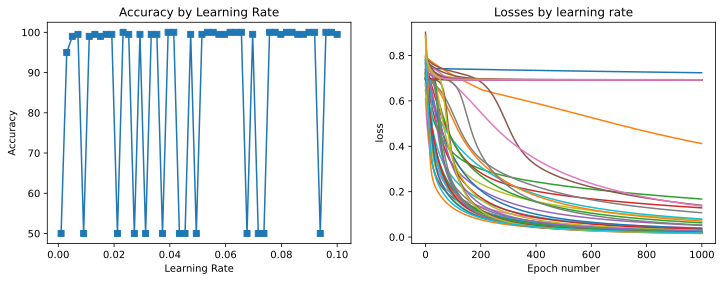

In [18]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('loss')